### Task: Create PageRank algorythm and test it on simple examples

PageRank was developed to rank importance of web pages (hence the name PageRank). Mathematically, PageRank is trying to find stationary distribution of Markov chain created by links. The probabilities are determined by number of outcoming links. There is also addition of taxation in form of damping factor $d$. It's responsible for adding the ability to start again at random page. Given $N$ pages are in network, the PageRank of page $i$, denoted by $PR(i)$, is given by:
\begin{equation}
PR(i) = \frac{1-d}{N} + d \cdot \sum_{j \in M(i)} \frac{PR(j)}{L(j)},
\end{equation}
where $M(i)$ are pages that have outcoming links to $i$ and $L(j)$ is the number of outcoming links from $j$. Let's see how this works in an example.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

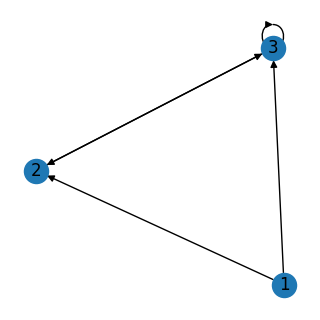

In [2]:
M = np.asanyarray([[0,0,0],[1,0,1],[1,1,1]], dtype=np.float32)
G = nx.DiGraph(M.T)
G = nx.relabel_nodes(G, lambda x: x + 1)
plt.figure(figsize = (3,3))
nx.draw(G, with_labels = True)

We can associate this graph with transition matrix $P$ (which is row stochastic). Each element in such matrix denotes probability of transition. $p_{ij}$ is the probability of going from $i$ to $j$. The graph above is associated with following transition matrix

$P =
 \begin{pmatrix}
  0 & \frac{1}{2} & \frac{1}{2} \\
  0 & 0 & 1 \\
  0  & \frac{1}{2}  & \frac{1}{2}
 \end{pmatrix}$.

 Stationary distribution $\pi$ is such distribution, that satisfies $\pi = \pi P$. It can be easily shown, that for this graph $\pi = [0, \frac{1}{3}, \frac{2}{3}]$ is stationary distribution. For dampening factor equal $1$, this stationary distribution *is* the PageRank of network shown above.

For any inital distribution $\pi_0$, if P is ergodic (which means you can reach any node from anywhere and there is no periodic behaviours e.g. going back and forward between two sites that only have links to each other), then $\lim_{n \to \infty} \pi_0 \cdot P^n = \pi$. Addition of taxation assures that P *is* ergodic, so we can use any inital distribution - usually it's uniform distribution.

In [3]:
class Pagerank:
  def __init__(self, M):
    self.M = M #incidence matrix
    self.s = np.sum(self.M, axis = 0)
    self.s[self.s == 0] = 1 #if sum is 0, then set the sum to 1 (to avoid dividing by 0)
    self.SM = self.M / self.s #stochastic matrix
    self.v = np.ones(self.SM.shape[0])/self.SM.shape[0] #PageRank vector

  def algorithm(self, iter_num = 100, taxation = True, d = 0.85):
    if taxation:
      for i in range(iter_num):
        self.v = d*np.dot(self.SM, self.v) + (1-d)*np.ones(self.SM.shape[0])/self.SM.shape[0]
    else:
      for i in range(iter_num):
        self.v = np.dot(self.SM, self.v)


In [4]:
M_pagerank = Pagerank(M = M)
M_pagerank.algorithm(d=1)
print(f"PageRank without taxation: {M_pagerank.v/np.sum(M_pagerank.v, axis=-1)}")

PageRank without taxation: [0.         0.33333333 0.66666667]


This result coincides with theoretical value $\pi = [0, \frac{1}{3}, \frac{2}{3}]$. Now let's add taxation with damping factor $d = 0.85$. We will also see how this class compares with networkx pagerank.

In [5]:
M_pagerank = Pagerank(M = M)
M_pagerank.algorithm()
print(f"PageRank: {M_pagerank.v} \nPageRank networkx: {nx.pagerank(G).values()}")

PageRank: [0.05       0.33333333 0.61666667] 
PageRank networkx: dict_values([0.05, 0.33333333333333337, 0.6166666666666668])


PageRank: [0.3245614 0.2251462 0.2251462 0.2251462] 
PageRank networkx: dict_values([0.3245609358176832, 0.2251463547274389, 0.2251463547274389, 0.2251463547274389])


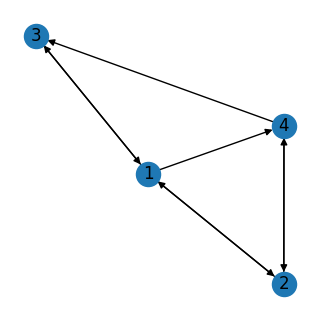

In [6]:
M = np.asanyarray(
    [[0,1,1,0],
     [1,0,0,1],
     [1,0,0,1],
     [1,1,0,0]],
    dtype=np.float32)

G = nx.DiGraph(M.T)
G = nx.relabel_nodes(G, lambda x: x + 1)
plt.figure(figsize = (3,3))
nx.draw(G, with_labels = True)

M_pagerank = Pagerank(M = M)
M_pagerank.algorithm()
print(f"PageRank: {M_pagerank.v/np.sum(M_pagerank.v, axis=-1)} \nPageRank networkx: {nx.pagerank(G).values()}")

PageRank: [0.15636198 0.20066454 0.20066454 0.20066454 0.24164441] 
PageRank networkx: dict_values([0.15636205984972656, 0.20066443012382687, 0.20066443012382687, 0.20066443012382687, 0.24164464977879282])


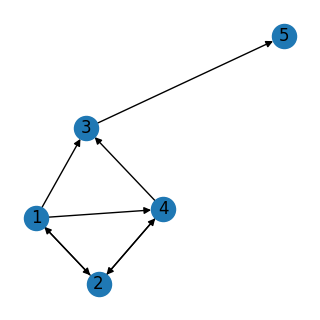

In [7]:
M = np.asanyarray(
    [[0,1,0,0,0],
     [1,0,0,1,0],
     [1,0,0,1,0],
     [1,1,0,0,0],
     [0,0,1,0,0]],
    dtype=np.float32)

G = nx.DiGraph(M.T)
G = nx.relabel_nodes(G, lambda x: x + 1)
plt.figure(figsize = (3,3))
nx.draw(G, with_labels = True)

M_pagerank = Pagerank(M = M)
M_pagerank.algorithm()
print(f"PageRank: {M_pagerank.v/np.sum(M_pagerank.v, axis=-1)} \nPageRank networkx: {nx.pagerank(G).values()}")

PageRank: [0.25255249 0.30822578 0.43922173] 
PageRank networkx: dict_values([0.25255265830419843, 0.3082255419261199, 0.43922179976968145])


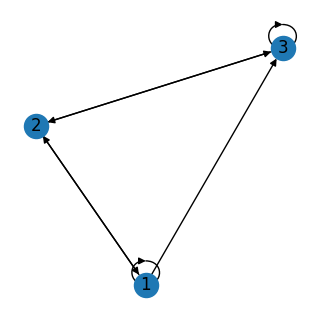

In [8]:
M = np.asanyarray(
    [[1,1,0],
     [1,0,1],
     [1,1,1]],
    dtype=np.float32)

G = nx.DiGraph(M.T)
G = nx.relabel_nodes(G, lambda x: x + 1)
plt.figure(figsize = (3,3))
nx.draw(G, with_labels = True)

M_pagerank = Pagerank(M = M)
M_pagerank.algorithm()
print(f"PageRank: {M_pagerank.v/np.sum(M_pagerank.v, axis=-1)} \nPageRank networkx: {nx.pagerank(G).values()}")

PageRank: [0.35087719 0.64912281] 
PageRank networkx: dict_values([0.3508773619358619, 0.649122638064138])


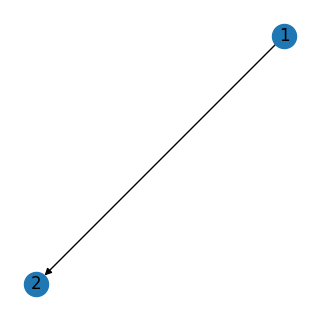

In [9]:
M = np.asanyarray(
    [[0,0],
     [1,0]],
    dtype=np.float32)

G = nx.DiGraph(M.T)
G = nx.relabel_nodes(G, lambda x: x + 1)
plt.figure(figsize = (3,3))
nx.draw(G, with_labels = True)

M_pagerank = Pagerank(M = M)
M_pagerank.algorithm()
print(f"PageRank: {M_pagerank.v/np.sum(M_pagerank.v, axis=-1)} \nPageRank networkx: {nx.pagerank(G).values()}")

PageRank: [0.5 0.5] 
PageRank networkx: dict_values([0.5, 0.5])


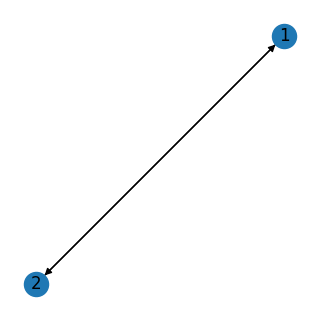

In [10]:
M = np.asanyarray(
    [[0,1],
     [1,0]],
    dtype=np.float32)

G = nx.DiGraph(M.T)
G = nx.relabel_nodes(G, lambda x: x + 1)
plt.figure(figsize = (3,3))
nx.draw(G, with_labels = True)

M_pagerank = Pagerank(M = M)
M_pagerank.algorithm()
print(f"PageRank: {M_pagerank.v/np.sum(M_pagerank.v, axis=-1)} \nPageRank networkx: {nx.pagerank(G).values()}")

PageRank: [0.09756098 0.09756098 0.09756098 0.09756098 0.09756098 0.51219512] 
PageRank networkx: dict_values([0.0975607768593787, 0.0975607768593787, 0.0975607768593787, 0.0975607768593787, 0.0975607768593787, 0.5121961157031062])


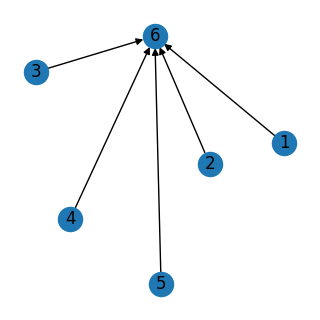

In [11]:
M = np.asanyarray(
    [[0,0,0,0,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0],
     [1,1,1,1,1,0]],
    dtype=np.float32)

G = nx.DiGraph(M.T)
G = nx.relabel_nodes(G, lambda x: x + 1)
plt.figure(figsize = (3,3))
nx.draw(G, with_labels = True)

M_pagerank = Pagerank(M = M)
M_pagerank.algorithm()
print(f"PageRank: {M_pagerank.v/np.sum(M_pagerank.v, axis=-1)} \nPageRank networkx: {nx.pagerank(G).values()}")